# RTBP Problem  WorkPrecision

<ul id="top">
<li><a href="#Loading-packages"> 
             Loading Packages</a></li>
    
<li><a href="#Computer-properties"> 
             Computer properties</a></li>  

<li><a href="#Initial-value-problem:-RTBP">
             Initial value problem: RTBP</a></li>
             
<li><a href="#Test-solution">
             Test solution</a></li>             

<li><a href="#Work-Precision-diagrams-(Float64)">
             Work-Precision diagrams (Float64)</a></li> 

<li><a href="#Work-Precision-diagrams-(Float128)">
             Work-Precision diagrams (Float128)</a></li> 
             

</ul>  

## Loading packages

In [1]:
using OrdinaryDiffEq,DiffEqDevTools,BenchmarkTools
using Plots,LinearAlgebra
using Dates
using JLD2, FileIO
using IRKGaussLegendre

<a href="#top">Back to the top</a>

## Computer properties

In [2]:
#export JULIA_NUM_THREADS=4
Threads.nthreads()

4

In [3]:
#;cat /proc/cpuinfo # on Linux machines

In [3]:
using Hwloc
Hwloc.num_physical_cores()

8

<a href="#top">Back to the top</a>

## Initial value problem:  RTBP

In [4]:
setprecision(BigFloat, 108);
include("../ODEProblems/RTBP.jl")
include("../ODEProblems/InitialRTBP.jl")


t0=0.0
t1=parse(Float64,"17.0652165601579625588917206249")

u064,μ64 =InitialRTBP(Float64)
tspan64=(t0,2*t1)
prob64 = ODEProblem(f,u064,tspan64,[μ64]);

u0128,μ128=InitialRTBP(BigFloat)
tspan128=(BigFloat(t0),2*parse(BigFloat,"17.0652165601579625588917206249"))
prob128 = ODEProblem(f,u0128,tspan128,[μ128]);
(typeof(u064),typeof(μ64),typeof(tspan64),typeof(u0128),typeof(μ128),typeof(tspan128))

(Vector{Float64}, Float64, Tuple{Float64, Float64}, Vector{BigFloat}, BigFloat, Tuple{BigFloat, BigFloat})

<a href="#top">Back to the top</a>

## Test solution

In [5]:
setprecision(BigFloat, 256)
#sol =solve(prob128,Vern9(),save_everystep=false,abstol=1e-32,reltol=1e-32);
#@save "./Data/RTBP_test_sol.jld2" sol

@load "./Data/RTBP_test_sol.jld2" sol
#test_sol = TestSolution(sol);
#sol.destats

test_sol=sol
#test_sol=TestSolution(tspan64,[sol.u[1]])

u0256,μ256 =InitialRTBP(BigFloat)
E0=RTBPEnergy(u0256,μ256)
(Float32(sol.t[end]),Float32(RTBPEnergy(sol.u[end],μ256)/E0.-1))

(17.065216f0, 3.193987f-31)

<a href="#top">Back to the top</a>

## Work-Precision diagrams (Float64)

### Computations

In [6]:
abstols = 1.0 ./ 10.0 .^ (10:14)
reltols = 1.0 ./ 10.0 .^ (10:14);

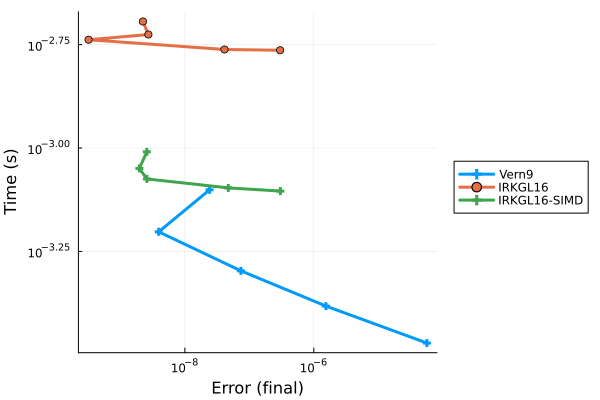

In [7]:
setups = [
           Dict(:alg=>Vern9(),:adaptive=>true)
           Dict(:alg=>IRKGL16(simd=false),:adaptive=>true) 
           Dict(:alg=>IRKGL16(simd=true),:adaptive=>true) 
]
solnames = ["Vern9", "IRKGL16", "IRKGL16-SIMD"]
wp1 = WorkPrecisionSet(prob64,abstols,reltols,setups; appxsol=test_sol, names=solnames,
                       save_everystep=false,numruns=20,maxiters=10^9);
plot(wp1)

<a href="#top">Back to the top</a>

## Work-Precision diagrams (Float128)

In [8]:
setprecision(BigFloat, 108)
abstols = BigFloat.(1.0 ./ 10.0 .^ (12:20))
reltols = BigFloat.(1.0 ./ 10.0 .^ (12:20));

### Computations

In [9]:
setups = [ Dict(:alg=>Vern9(),:adaptive=>true)
           Dict(:alg=>IRKGL16(),:adaptive=>true) 
           Dict(:alg=>IRKGL16(threading=true),:adaptive=>true) 
]
solnames = ["Vern9","IRKGL16-adaptive", "IRKGL16-adaptive(thread)"]
wp2 = WorkPrecisionSet(prob128,abstols,reltols,setups;appxsol=test_sol,save_everystep=false,
                        names=solnames,numruns=10,maxiters=10^9);

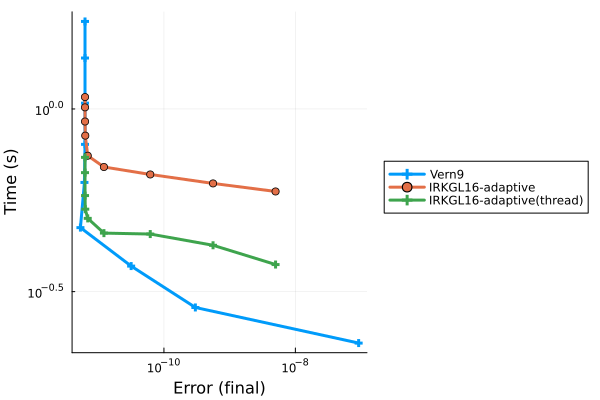

In [10]:
plot(wp2)

<a href="#top">Back to the top</a>